<a href="https://colab.research.google.com/github/Desmyk/ADVMachineLearning/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


In [25]:
# The dataset used for this project is from Kaggle.
# Dataset link : 'https://www.kaggle.com/shwetabh123/mall-customers'
# contains 200 entries.

In [10]:
# Load the dataset
data = pd.read_csv('Mall_Customers.csv')
data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
data.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
195,196,Female,35,120,79,2
196,197,Female,45,126,28,3
197,198,Male,32,126,74,2
198,199,Male,32,137,18,3
199,200,Male,30,137,83,2


In [13]:
# Check the number of rows and columns
data.shape

(200, 5)

In [15]:
# Check the summary statistics
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [17]:
# Check for missing values
data.isnull().sum()

# no missing values

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

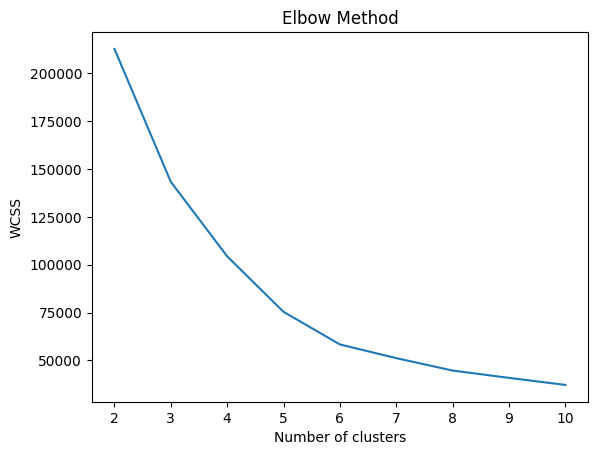

In [21]:
# Let's proceed with the analysis.

# we define the features for clustering
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Apply K-Means clustering with different numbers of clusters
wcss = []
silhouette = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
    silhouette.append(silhouette_score(features, kmeans.labels_))


#WCSS - Within cluster sum of squares

# Plot the elbow method
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

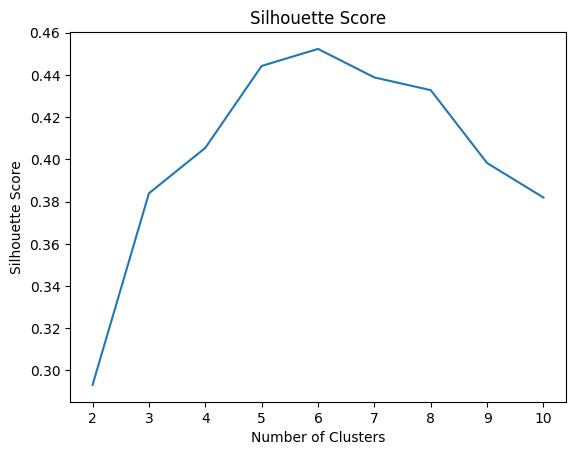

In [19]:
# Plot the Silhouette score
plt.plot(range(2, 11), silhouette)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# Based on the Elbow curve and Silhouette score plot, I choose 5 clusters as the
# optimal number.

In [22]:
# Cluster Interpretation
# Let's analyze the characteristics of each cluster.

# Apply K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(features)

# Get the cluster labels
labels = kmeans.labels_

# Create a new dataframe with the cluster labels
data['Cluster'] = labels

# Analyze the characteristics of each cluster
for i in range(5):
    cluster_data = data[data['Cluster'] == i]
    print(f'Cluster {i+1}:')
    print(f'Age: {cluster_data["Age"].mean():.2f} ({cluster_data["Age"].std():.2f})')
    print(f'Annual Income: ${cluster_data["Annual Income (k$)"].mean():.2f}k ({cluster_data["Annual Income (k$)"].std():.2f}k)')
    print(f'Spending Score: {cluster_data["Spending Score (1-100)"].mean():.2f} ({cluster_data["Spending Score (1-100)"].std():.2f})')
    print()

Cluster 1:
Age: 45.22 (13.23)
Annual Income: $26.30k (7.89k)
Spending Score: 20.91 (13.02)

Cluster 2:
Age: 43.09 (16.48)
Annual Income: $55.29k (8.71k)
Spending Score: 49.57 (6.24)

Cluster 3:
Age: 32.69 (3.73)
Annual Income: $86.54k (16.31k)
Spending Score: 82.13 (9.36)

Cluster 4:
Age: 40.67 (11.50)
Annual Income: $87.75k (16.39k)
Spending Score: 17.58 (10.20)

Cluster 5:
Age: 25.52 (5.27)
Annual Income: $26.30k (7.89k)
Spending Score: 78.57 (10.95)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


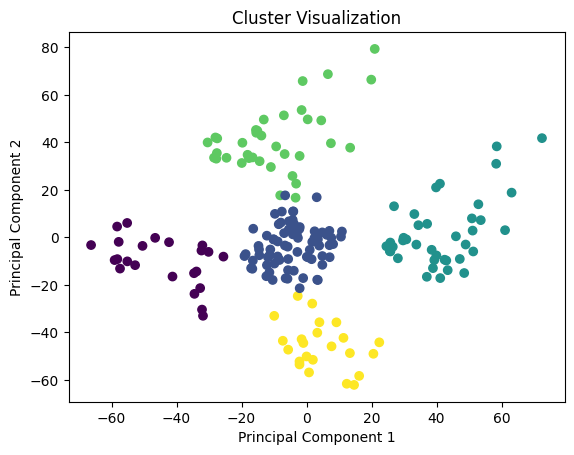

In [23]:
# Cluster Visualization
# Let's visualize to see the separation of each cluster

# Apply PCA to reduce the dimensionality to 2D
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

# Create a scatterplot of the clusters
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels)
plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# As from the above visualization, clusters are well-separated.
# The visualization provides a clear understanding of the customer segments.

In [ ]:
# CONCLUSION
# The clusters have different characteristics.
# This analysis can be used to develop targeted marketing strategies
# It can as well be used to improve customer engagement.